In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def obj(x,y): #objective function
  value = -(math.cos(math.pi*y))- math.exp(-math.pi*((x-0.5)**2))*(math.sin(math.pi*x)**2)
  return value

def ini_population(sol_num): #initial population
  population = [] 
  for i in range(sol_num):
    tmp1 = []  
    tmp1.append(random.uniform(-1,2)) #get the x by generate random number between -1 and 2
    tmp1.append(random.uniform(4,6))#get the y by generate random number between 4 and 6
    population.append(tmp1) 
  return population

In [ ]:
'''Calculate the fitness function value'''
def fitness(population,iter):
  fitness = []
  #put x y into objective function with penalty and caculate fitness value
  for i in range(len(population)): 
    value = obj(population[i][0],population[i][1])+((0.5*iter)**2)*(abs(5-(population[i][0]+population[i][1]))**2)
    #value = obj(population[i][0],population[i][1])+5-(population[i][0]+population[i][1])
    fitness.append(value)
  return fitness

In [ ]:
def update(population,c1,c2,w,generation,p_crazy):
  mv=np.array([0.5,0.5])
  x_range = np.array([3,2])
  v_bound= mv*x_range
  x_v_upper_bound = v_bound[0] #1.5
  x_v_lower_bound = -v_bound[0] #-1.5
  y_v_upper_bound = v_bound[1] #1
  y_v_lower_bound = -v_bound[1] #-1

  bound=[[-1,4],[2,6]]
  dimension = 2
  size = len(population)

  velocity = np.zeros((size, dimension)) # velocities of all particles
  for i in range(size):
    velocity[i][0] = random.uniform(x_v_lower_bound,x_v_upper_bound)
    velocity[i][1] = random.uniform(y_v_lower_bound,y_v_upper_bound)
  
  population = np.array(population) # initial population
  pbest = population  # The optimal position of each particle
  gbest = np.array([2,5])  # The best location in the all particle

  for i in range(size):
    #update velocity
    velocity[i] = w*velocity[i] + c1*random.uniform(0,1)*(pbest[i]-population[i])+ c2*random.uniform(0,1)*(gbest-population[i])
    #craziness
    if random.uniform(0,1) < p_crazy: 
      velocity[i] = v_bound * random.uniform(0,1)

    # velocity limit
    if velocity[i][0] > x_v_upper_bound :
      velocity[i][0]= x_v_upper_bound

    if velocity[i][0] < x_v_lower_bound :
      velocity[i][0]= x_v_lower_bound

    if velocity[i][1] > y_v_upper_bound :
      velocity[i][1]= y_v_upper_bound

    if velocity[i][1] < y_v_lower_bound :
      velocity[i][1]= y_v_lower_bound

    #update location  
    population[i]=population[i]+velocity[i]
    #location limit
    for j in range(dimension): 
      if population[i][j] > bound[1][j]: #location upper bound
        population[i][j] = bound[1][j] 
      elif population[i][j] < bound[0][j]: #location lower bound
        population[i][j] = bound[0][j]
    #update pbest
    if fitness(population,generation)[i] < fitness(pbest,generation)[i]: 
      pbest[i] = population[i].copy()
    #update gbest
    if fitness(population,generation)[i] < obj(gbest[0],gbest[1])+((0.5*generation)**2)*(abs(5-(gbest[0]+gbest[1]))**2): 
      gbest = population[i].copy()

  return population

In [ ]:
'''Find the best fitness and the corresponding x, y in the current Population'''
def best(population):
  pop_len = len(population)
  best_x_y,fitness_value = [],[]
  best_fitness =100

  for i in range(pop_len):
    fitness_value.append( obj(population[i][0],population[i][1] ) )#put x and y into objective function

  for i in range(pop_len):
    if (fitness_value[i] < best_fitness): #Compare the fitness of each set of chromosomes to the best value
    #If the fitness of this set of chromosomes < optimal value, replace the optimal solution,and x,y
      best_fitness = fitness_value[i]
      best_x_y = population[i]

  return best_x_y,best_fitness

In [ ]:
def plot(results):
  X = []
  Y = []
  for i in range(iter_num):
    X.append(i)
    Y.append(results[i])
  plt.plot(X,Y)
  plt.xlabel('Number of iteration',size = 15)
  plt.ylabel('fitness value',size = 15)
  plt.title('PSO convergence history',size = 15)
  plt.show()

In [ ]:
def PSO(iter_num,population_size,c1,c2,w,p_crazy):
  population = ini_population(population_size)
  best_x_y = np.array([0,0])
  best_fitness = 100
  results_fit,results_x_y = [],[]

  for i in range(iter_num):
    new_pop = update(population,c1,c2,w,i,p_crazy)
    current_x_y,current_fitness = best(new_pop) #best x y and best objective value
    # Compared with the previous optimal fitness function value, 
    if current_fitness < best_fitness:
      best_fitness = current_fitness
      best_x_y = current_x_y
    
    print('iteration is :',i,'Best x and y:',best_x_y,'Best fitness',best_fitness)
    results_fit.append(best_fitness) # save fitness in each iteration
    results_x_y.append(best_x_y) # sava x and y in each iteration

  print('Final x and y :',results_x_y[-1])
  print('Final objective value :',best_fitness)
  plot(results_fit)
  return best_fitness

iteration is : 0 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 1 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 2 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 3 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 4 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 5 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 6 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 7 Best x and y: [0.48642269 6.        ] Best fitness -1.9976037955222425
iteration is : 8 Best x and y: [0.48826454 6.        ] Best fitness -1.9982093827433751
iteration is : 9 Best x and y: [0.48826454 6.        ] Best fitness -1.9982093827433751
iteration is : 10 Best x and y: [0.48826454 6.        ] Best fitness -1.9982093827433751
iteration is : 11 Best x and y:

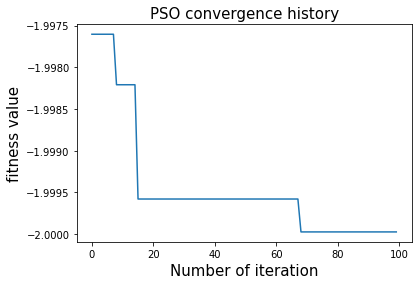

-1.999974242921433

In [ ]:
iter_num=100
c1,c2,w,p_crazy = 2,2,0.8,0.1
population_size = 100
PSO(iter_num,population_size,c1,c2,w,p_crazy)

In [ ]:
# run PSO 10 times 
iter_num=100
c1,c2,w,p_crazy = 2,2,0.8,0.1
population_size = 100
PSO_result =[]

for i in range(30):
  result = PSO(iter_num,population_size,c1,c2,w,p_crazy)
  PSO_result.append(result)
  print('PSO round :',i+1,'final objective value :',result)

averge_value = np.mean(PSO_result)
std = np.std(PSO_result)
print('averge =',averge_value ,'standard deviation',std)

PSO round : 1 final objective value : -1.9999934601210612
PSO round : 2 final objective value : -1.9999989506336582
PSO round : 3 final objective value : -1.9999986844859494
PSO round : 4 final objective value : -1.999954831583567
PSO round : 5 final objective value : -1.9999999951562928
PSO round : 6 final objective value : -1.9997986298280153
PSO round : 7 final objective value : -1.9999985128862943
PSO round : 8 final objective value : -1.9999984179347026
PSO round : 9 final objective value : -1.999999766727265
PSO round : 10 final objective value : -1.9999978878702482
PSO round : 11 final objective value : -1.9999968119108908
PSO round : 12 final objective value : -1.9999943698707745
PSO round : 13 final objective value : -1.9999109699301727
PSO round : 14 final objective value : -1.9999977041881545
PSO round : 15 final objective value : -1.999961721583873
PSO round : 16 final objective value : -1.9999985920094558
PSO round : 17 final objective value : -1.9999994324769437
PSO round

In [ ]:
PSO_result